# Housing Price Prediction

This project aims to predict the prices of housing with regression techniques and ANN (Artificial Neural Network).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.dummy import DummyRegressor

In [2]:
# importing data
df = pd.read_csv('housing price dataset.csv')
pd.set_option('display.max_rows', 81)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [3]:
# setting input features and output labels
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [4]:
# handling categorical data
categorical_columns = [(1, 'MSZoning'), (4, 'Street'), (5, 'Alley'), (6, 'LotShape'),
                       (7, 'LandContour'), (8, 'Utilities'), (9, 'LotConfig'),
                       (10, 'LandSlope'), (11, 'Neighborhood'), (12, 'Condition1'),
                       (13, 'Condition2'), (14, 'BldgType'), (15, 'HouseStyle'),
                       (20, 'RoofStyle'), (21, 'RoofMatl'), (22, 'Exterior1st'),
                       (23, 'Exterior2nd'), (24, 'MasVnrType'), (26, 'ExterQual'),
                       (27, 'ExterCond'), (28, 'Foundation'), (29, 'BsmtQual'),
                       (30, 'BsmtCond'), (31, 'BsmtExposure'), (32, 'BsmtFinType1'),
                       (34, 'BsmtFinType2'), (38, 'Heating'), (39, 'HeatingQC'),
                       (40, 'CentralAir'), (41, 'Electrical'), (52, 'KitchenQual'),
                       (54, 'Functional'), (56, 'FireplaceQu'), (57, 'GarageType'),
                       (59, 'GarageFinish'), (62, 'GarageQual'), (63, 'GarageCond'),
                       (64, 'PavedDrive'), (71, 'PoolQC'), (72, 'Fence'),
                       (73, 'MiscFeature'), (77, 'SaleType'), (78, 'SaleCondition')]

for col_index, col_name in categorical_columns[::-1]:
    col_cat = pd.get_dummies(X.iloc[:, col_index], drop_first=True)
    X.drop(col_name, axis=1, inplace=True)
    X = pd.concat([X, col_cat], axis=1)
    
X.replace(np.nan, 0, inplace=True)

In [5]:
# splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Dummy Regressor

The Dummy Regressor predicts that all prices are the mean price of the training dataset.

It is used as a benchmark to gauge our performance in the machine learning models used later.

In [6]:
# dummy regressor
dummy_majority = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_train_pred = dummy_majority.predict(X_train)
y_test_pred = dummy_majority.predict(X_test)

print('Dummy Regressor Training Scores:')
print('   R-squared: {:.3f}'.format(dummy_majority.score(X_train, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Dummy Regressor Test Scores:')
print('   R-squared: {:.3f}'.format(dummy_majority.score(X_test, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

dummy_score_df = pd.Series(['Dummy Regressor', 
                             dummy_majority.score(X_test, y_test), 
                             metrics.mean_absolute_error(y_test, y_test_pred),
                             metrics.mean_squared_error(y_test, y_test_pred),
                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                           index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Dummy Regressor Training Scores:
   R-squared: 0.000
   MAE: 57634.244
   MSE: 6208271071.287
   RMSE: 78792.583
--------------------------------------------------------
Dummy Regressor Test Scores:
   R-squared: -0.000
   MAE: 56661.181
   MSE: 6602482572.907
   RMSE: 81255.662
--------------------------------------------------------


In [7]:
# scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

A simple linear model predicts the housing price $\hat y$ using a linear combination of input features $x$.

$\hat y = w_0 + w_1 x_1 + ... + w_p x_p$ ,

where $w_1, ..., w_p$ represents the coefficients and $w_0$ represents the intercept

The Ordinary Least Squares method is used to minimise the residual sum of squares $\min\limits_{w}||Xw-y||_2^2$

In [8]:
# linear regression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

print('Linear Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Linear Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linreg_score_df = pd.Series(['Linear Regression', 
                              linreg.score(X_test_scaled, y_test), 
                              metrics.mean_absolute_error(y_test, y_test_pred),
                              metrics.mean_squared_error(y_test, y_test_pred),
                              np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                            index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Linear Regression Training Scores:
   R-squared: 0.944
   MAE: 12228.367
   MSE: 345176984.052
   RMSE: 18578.939
--------------------------------------------------------
Linear Regression Test Scores:
   R-squared: -321546434806041856.000
   MAE: 4810089878333.204
   MSE: 2122822807168055790849228800.000
   RMSE: 46074101262727.367
--------------------------------------------------------


### Ridge Regression

Ridge regression imposes a penalty term on the size of the coefficients.

It aims to minimise a penalised residual sum of squares  $\min\limits_{w}||Xw-y||_2^2 + \alpha ||w||_2^2$

In [9]:
# ridge regression
linridge = Ridge(alpha=15, max_iter = 10000).fit(X_train_scaled, y_train)
y_train_pred = linridge.predict(X_train_scaled)
y_test_pred = linridge.predict(X_test_scaled)

print('Ridge Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Ridge Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linridge_score_df = pd.Series(['Ridge Regression', 
                               linridge.score(X_test_scaled, y_test), 
                               metrics.mean_absolute_error(y_test, y_test_pred),
                               metrics.mean_squared_error(y_test, y_test_pred),
                               np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                              index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Ridge Regression Training Scores:
   R-squared: 0.900
   MAE: 15221.681
   MSE: 618727597.740
   RMSE: 24874.236
--------------------------------------------------------
Ridge Regression Test Scores:
   R-squared: 0.780
   MAE: 19086.710
   MSE: 1451694734.094
   RMSE: 38101.112
--------------------------------------------------------


### Lasso Regression

Lasso regression adds a regulaization term to a linear model.

It aims to minimise the least-squares penalty $\min\limits_{w}\frac{1}{2n_{samples}}||Xw-y||_2^2 + \alpha ||w||_1$

In [10]:
# lasso regression
linlasso = Lasso(alpha=3, max_iter = 10000).fit(X_train_scaled, y_train)
y_train_pred = linlasso.predict(X_train_scaled)
y_test_pred = linlasso.predict(X_test_scaled)

print('Lasso Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Lasso Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linlasso.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linlasso_score_df = pd.Series(['Lasso Regression', 
                               linlasso.score(X_test_scaled, y_test), 
                               metrics.mean_absolute_error(y_test, y_test_pred),
                               metrics.mean_squared_error(y_test, y_test_pred),
                               np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                              index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Lasso Regression Training Scores:
   R-squared: 0.944
   MAE: 12382.569
   MSE: 348405487.571
   RMSE: 18665.623
--------------------------------------------------------
Lasso Regression Test Scores:
   R-squared: 0.601
   MAE: 20783.918
   MSE: 2636433386.266
   RMSE: 51346.211
--------------------------------------------------------


### Elastic-Net Regression

Elastic-net regression adds two regulaization terms to a linear model.

It aims to minimise $\min\limits_{w}\frac{1}{2n_{samples}}||Xw-y||_2^2 + \alpha\rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2$

In [11]:
# elastic net regression
from sklearn.linear_model import ElasticNet

el = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42).fit(X_train_scaled, y_train)
y_train_pred = el.predict(X_train_scaled)
y_test_pred = el.predict(X_test_scaled)

print('Elastic-Net Regression Training Scores:')
print('   R-squared: {:.3f}'.format(el.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Elastic-Net Regression Test Scores:')
print('   R-squared: {:.3f}'.format(el.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

el_score_df = pd.Series(['Elastic-Net Regression', 
                         el.score(X_test_scaled, y_test), 
                         metrics.mean_absolute_error(y_test, y_test_pred),
                         metrics.mean_squared_error(y_test, y_test_pred),
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                        index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Elastic-Net Regression Training Scores:
   R-squared: 0.907
   MAE: 14735.651
   MSE: 577496069.094
   RMSE: 24031.148
--------------------------------------------------------
Elastic-Net Regression Test Scores:
   R-squared: 0.778
   MAE: 18901.120
   MSE: 1468020910.488
   RMSE: 38314.761
--------------------------------------------------------


### Polynomial Regression

Polynomial regression transforms the input features into polynomial features before performing regression on it.

In our case for a linear regression of a second-order polynomial, the linear regression model is applied to the second-order transformation of the input features.

In [12]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

linreg = LinearRegression(normalize=True)
linreg.fit(X_train_poly, y_train)

y_test_pred = linreg.predict(X_test_poly)
y_train_pred = linreg.predict(X_train_poly)

print('Polynomial Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_train_poly, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Polynomial Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_test_poly, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

polyreg_score_df = pd.Series(['Polynomial Regression', 
                              linreg.score(X_test_poly, y_test), 
                              metrics.mean_absolute_error(y_test, y_test_pred),
                              metrics.mean_squared_error(y_test, y_test_pred),
                              np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                            index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Polynomial Regression Training Scores:
   R-squared: 1.000
   MAE: 0.000
   MSE: 0.000
   RMSE: 0.000
--------------------------------------------------------
Polynomial Regression Test Scores:
   R-squared: -0.183
   MAE: 35057.159
   MSE: 7813202137.024
   RMSE: 88392.319
--------------------------------------------------------


### Support Vector Regression

Support vector regression transform the input features into higher dimensions, before applying a mathematical decision function to determine a hyperplane that maps input feature into predicted output.

In [13]:
# support vector regression
from sklearn.svm import SVR

svm = SVR(kernel='rbf', C=1000000, epsilon=0.01).fit(X_train_scaled, y_train)
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

print('Support Vector Regression Training Scores:')
print('   R-squared: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Support Vector Regression Test Scores:')
print('   R-squared: {:.3f}'.format(svm.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

svm_score_df = pd.Series(['Support Vector Regression', 
                          svm.score(X_test_scaled, y_test), 
                          metrics.mean_absolute_error(y_test, y_test_pred),
                          metrics.mean_squared_error(y_test, y_test_pred),
                          np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                         index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Support Vector Regression Training Scores:
   R-squared: 0.994
   MAE: 714.148
   MSE: 38740949.422
   RMSE: 6224.223
--------------------------------------------------------
Support Vector Regression Test Scores:
   R-squared: 0.839
   MAE: 17329.339
   MSE: 1063651626.684
   RMSE: 32613.672
--------------------------------------------------------


### Artificial Neural Network (ANN)

ANN is a deep learning method that uses a Multi-layer Perception (MLP), which applies a non-linear function on a weighted combination of input features several times before achieving a predicted output value.

In [14]:
# artificial neural network
X_train_input = []

for i in range(len(X_train)):
    one_input = []
    for j in X_train.iloc[i, :]:
        one_input.append(j)
    X_train_input.append(one_input)

X_train_input = np.array(X_train_input, dtype=float)
y_train_input = np.array(list(y_train), dtype=float)

In [15]:
# creating Keras model
model = Sequential()
model.add(Dense(1, input_dim=245))
model.add(Dense(160))
model.add(Dense(160))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_input, y_train_input, epochs=300)

Epoch 1/300
35/35 [==============================] - 0s 712us/step - loss: 37502799872.0000
Epoch 2/300
35/35 [==============================] - 0s 712us/step - loss: 20134090752.0000
Epoch 3/300
35/35 [==============================] - 0s 855us/step - loss: 5022116352.0000
Epoch 4/300
35/35 [==============================] - 0s 969us/step - loss: 4449956864.0000
Epoch 5/300
35/35 [==============================] - 0s 1ms/step - loss: 3740802560.0000
Epoch 6/300
35/35 [==============================] - 0s 1ms/step - loss: 3469697280.0000
Epoch 7/300
35/35 [==============================] - 0s 1ms/step - loss: 3131960064.0000
Epoch 8/300
35/35 [==============================] - 0s 1ms/step - loss: 2848460544.0000
Epoch 9/300
35/35 [==============================] - 0s 798us/step - loss: 2684160000.0000
Epoch 10/300
35/35 [==============================] - 0s 741us/step - loss: 2539145728.0000
Epoch 11/300
35/35 [==============================] - 0s 712us/step - loss: 2436368128.0000
Epo

35/35 [==============================] - 0s 798us/step - loss: 1581246080.0000
Epoch 91/300
35/35 [==============================] - 0s 741us/step - loss: 1541397376.0000
Epoch 92/300
35/35 [==============================] - 0s 684us/step - loss: 1551745792.0000
Epoch 93/300
35/35 [==============================] - 0s 769us/step - loss: 1561837440.0000
Epoch 94/300
35/35 [==============================] - 0s 826us/step - loss: 1542136192.0000
Epoch 95/300
35/35 [==============================] - 0s 769us/step - loss: 1540801536.0000
Epoch 96/300
35/35 [==============================] - 0s 712us/step - loss: 1527551232.0000
Epoch 97/300
35/35 [==============================] - 0s 798us/step - loss: 1552839936.0000
Epoch 98/300
35/35 [==============================] - 0s 741us/step - loss: 1546137344.0000
Epoch 99/300
35/35 [==============================] - 0s 712us/step - loss: 1537812352.0000
Epoch 100/300
35/35 [==============================] - 0s 684us/step - loss: 1524249216.0000


35/35 [==============================] - 0s 712us/step - loss: 1483409664.0000
Epoch 179/300
35/35 [==============================] - 0s 798us/step - loss: 1461580672.0000
Epoch 180/300
35/35 [==============================] - 0s 798us/step - loss: 1442819200.0000
Epoch 181/300
35/35 [==============================] - 0s 741us/step - loss: 1484421504.0000
Epoch 182/300
35/35 [==============================] - 0s 684us/step - loss: 1465156736.0000
Epoch 183/300
35/35 [==============================] - 0s 826us/step - loss: 1473618304.0000
Epoch 184/300
35/35 [==============================] - 0s 769us/step - loss: 1459709312.0000
Epoch 185/300
35/35 [==============================] - 0s 684us/step - loss: 1439013888.0000
Epoch 186/300
35/35 [==============================] - 0s 741us/step - loss: 1450374400.0000
Epoch 187/300
35/35 [==============================] - 0s 826us/step - loss: 1459932544.0000
Epoch 188/300
35/35 [==============================] - 0s 912us/step - loss: 1443090

35/35 [==============================] - 0s 712us/step - loss: 1348110848.0000
Epoch 267/300
35/35 [==============================] - 0s 627us/step - loss: 1327931520.0000
Epoch 268/300
35/35 [==============================] - 0s 769us/step - loss: 1334984064.0000
Epoch 269/300
35/35 [==============================] - 0s 769us/step - loss: 1380418816.0000
Epoch 270/300
35/35 [==============================] - 0s 798us/step - loss: 1326275072.0000
Epoch 271/300
35/35 [==============================] - 0s 826us/step - loss: 1322483328.0000
Epoch 272/300
35/35 [==============================] - 0s 940us/step - loss: 1304956928.0000
Epoch 273/300
35/35 [==============================] - 0s 997us/step - loss: 1328366464.0000
Epoch 274/300
35/35 [==============================] - 0s 883us/step - loss: 1330060544.0000
Epoch 275/300
35/35 [==============================] - 0s 826us/step - loss: 1335406208.0000
Epoch 276/300
35/35 [==============================] - 0s 712us/step - loss: 1346702

In [16]:
X_test_input = []

for i in range(len(X_test)):
    one_input = []
    for j in X_test.iloc[i, :]:
        one_input.append(j)
    X_test_input.append(one_input)

In [17]:
y_train_pred = model.predict(np.array(X_train_input, dtype=float))
y_train_pred = list(map(lambda x: x[0], y_train_pred))
r2_train = 1 - ((((y_train - y_train_pred) ** 2).sum()) / (((y_train - y_train.mean()) ** 2).sum()))

y_test_pred = model.predict(np.array(X_test_input, dtype=float))
y_test_pred = list(map(lambda x: x[0], y_test_pred))
r2_test = 1 - ((((y_test - y_test_pred) ** 2).sum()) / (((y_test - y_test.mean()) ** 2).sum()))

In [18]:
print('ANN Training Scores:')
print('   R-squared: {:.3f}'.format(r2_train))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('ANN Test Scores:')
print('   R-squared: {:.3f}'.format(r2_test))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

ann_score_df = pd.Series(['Artificial Neural Network', 
                          r2_test, 
                          metrics.mean_absolute_error(y_test, y_test_pred),
                          metrics.mean_squared_error(y_test, y_test_pred),
                          np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                         index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

ANN Training Scores:
   R-squared: 0.799
   MAE: 22851.275
   MSE: 1249362106.846
   RMSE: 35346.317
--------------------------------------------------------
ANN Test Scores:
   R-squared: 0.592
   MAE: 24609.621
   MSE: 2691191020.478
   RMSE: 51876.691
--------------------------------------------------------


In [19]:
score_df = pd.concat([dummy_score_df, linreg_score_df, linridge_score_df, linlasso_score_df, 
                      el_score_df, polyreg_score_df, svm_score_df, ann_score_df], axis=1)
score_df.T

,Model,R-squared,MAE,MSE,RMSE
0,Dummy Regressor,-0.000086,56661.18146,6602482572.906785,81255.66179
1,Linear Regression,-321546434806041856.0,4810089878333.204102,2122822807168055790849228800.0,46074101262727.367188
2,Ridge Regression,0.78011,19086.710154,1451694734.093662,38101.11198
3,Lasso Regression,0.600656,20783.918129,2636433386.265883,51346.211022
4,Elastic-Net Regression,0.777637,18901.120366,1468020910.488257,38314.761
5,Polynomial Regression,-0.183475,35057.15912,7813202137.024371,88392.319446
6,Support Vector Regression,0.838887,17329.339405,1063651626.683983,32613.672389
7,Artificial Neural Network,0.592362,24609.621244,2691191020.477753,51876.690531


From the results, we can see that the Support Vector Regression model has outperformed the other models with the highest R-squared value, and lowest MAE, MSE, and RSME values.

Therefore, the Support Vector Regression model is best able to predict housing prices.

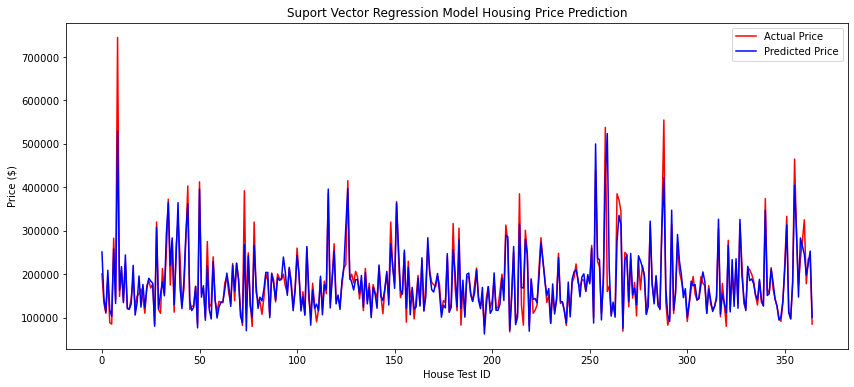

In [20]:
# visual plot of support vector regression prediction
plt.figure(figsize=(14,6))
plt.plot(range(len(y_test)), y_test, color='r', label='Actual Price')
plt.plot(range(len(y_test)), svm.predict(X_test_scaled), color='b', label='Predicted Price')
plt.title('Suport Vector Regression Model Housing Price Prediction')
plt.ylabel('Price ($)')
plt.xlabel('House Test ID')
plt.legend()
plt.show()